In [ ]:
#Definir FUNCIÓN que me permitirá importar un archivo CSV y cargarlo en un DataFrame de pandas
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd  #Python llama a paquetería pandas 
    return pd.read_csv(file)

In [ ]:
#Utilizar el nombre de la FUNCIÓN PREdefinida y la ruta de acceso (path) al archivo .csv de interés
import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")
terminos_df = import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

# Scatter plot with linear regretion = scipy.stats.linregress

###### A simple and quick function for performing linear regression on two variables. It calculates the slope, intercept, R-squared, p-value, and standard error. Best for basic, exploratory analysis with one independent variable

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = terminos_df['ta_micromol_kg']
y = terminos_df['dic_micromol_kg']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [ ]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

# Perform least squares (OLS) regression: scipy.stats.linregress

###### A powerful and detailed linear regression tool that supports both simple and multiple linear regression. It provides a full statistical report, including p-values, confidence intervals, and diagnostic tests. Ideal for professional data analysis and scientific reporting.

In [ ]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = terminos_df['ta_micromol_kg']
y = terminos_df['dic_micromol_kg']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

In [ ]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")

# 12. Exercise: perform linear regressions of salinity vs temperature and dec vs salinity.

##### 12.1 Perform linear regressions of salinity vs temperature

In [14]:
terminos_df.columns  #Visualizar los nombres de las columnas del DataFrame

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

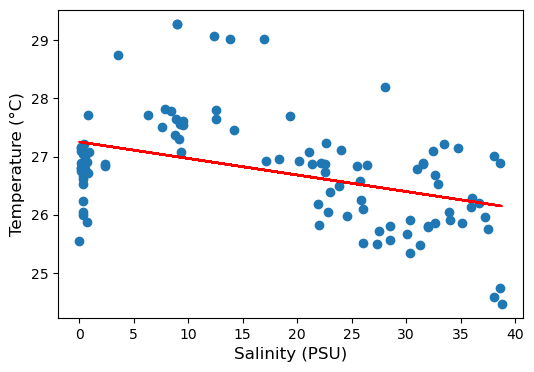

Slope: -0.028458717486946172


In [25]:
import matplotlib.pyplot as plt
from scipy import stats

x = terminos_df['sal_psu']
y = terminos_df['temp_c']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('Salinity (PSU)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)


# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [16]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684758
p_value: 6.879907520531129e-06
slope: -0.028458717486946172
intercept: 27.25200067150795


##### 12.2 Perform linear regressions of DIC vs salinity 

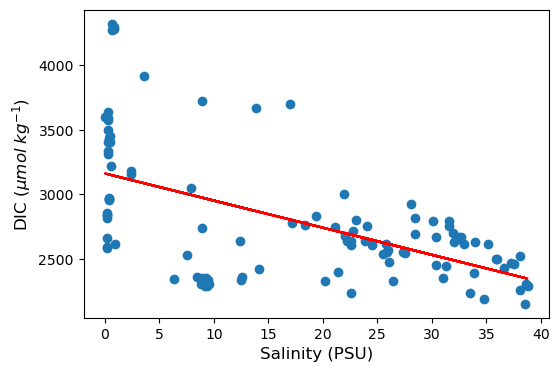

Slope: -21.053197646779648


In [26]:
import matplotlib.pyplot as plt
from scipy import stats

x = terminos_df['sal_psu']
y = terminos_df['dic_micromol_kg']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('Salinity (PSU)', fontsize=12)
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)


# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [18]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.3271047331022779
p_value: 1.5144104023764912e-10
slope: -21.053197646779648
intercept: 3162.8747564593123
